In [ ]:
# Imports
library(Seurat)
library(ggplot2)
library(decoupleR)
library(stringr) 
library(gridExtra)
library(dplyr)
library(tibble)
library(tidyr)
library(patchwork)
library(ggplot2)
library(pheatmap)
library(clusterProfiler)
library(org.Mm.eg.db)
library(fgsea)
library(msigdbr)
library(homologene)
library(ggrepel)


# Change setting for visualizing plots within VSCODE
options(repr.plot.width=18, repr.plot.height=22)

# Read annotated myeloid data
myeloids <- readRDS("../../../data/R Objects/Myeloid R Objects/all_humans_myeloid_results.rds")

Warning message:
"package 'ggrepel' was built under R version 4.4.2"


In [ ]:
# Get markers for annotated cell types
markers <- FindAllMarkers(myeloids, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
markers %>%
  group_by(cluster) %>%
  dplyr::filter(avg_log2FC > .75) %>%
  slice_head(n = 10) %>%
  ungroup() -> top10

# Heatmap
top10 <- markers %>% group_by(cluster) %>% top_n(10, avg_log2FC)

[1] Dendritic cells Monocytes       Macrophages     NK cluster     
Levels: Macrophages Monocytes Dendritic cells NK cluster

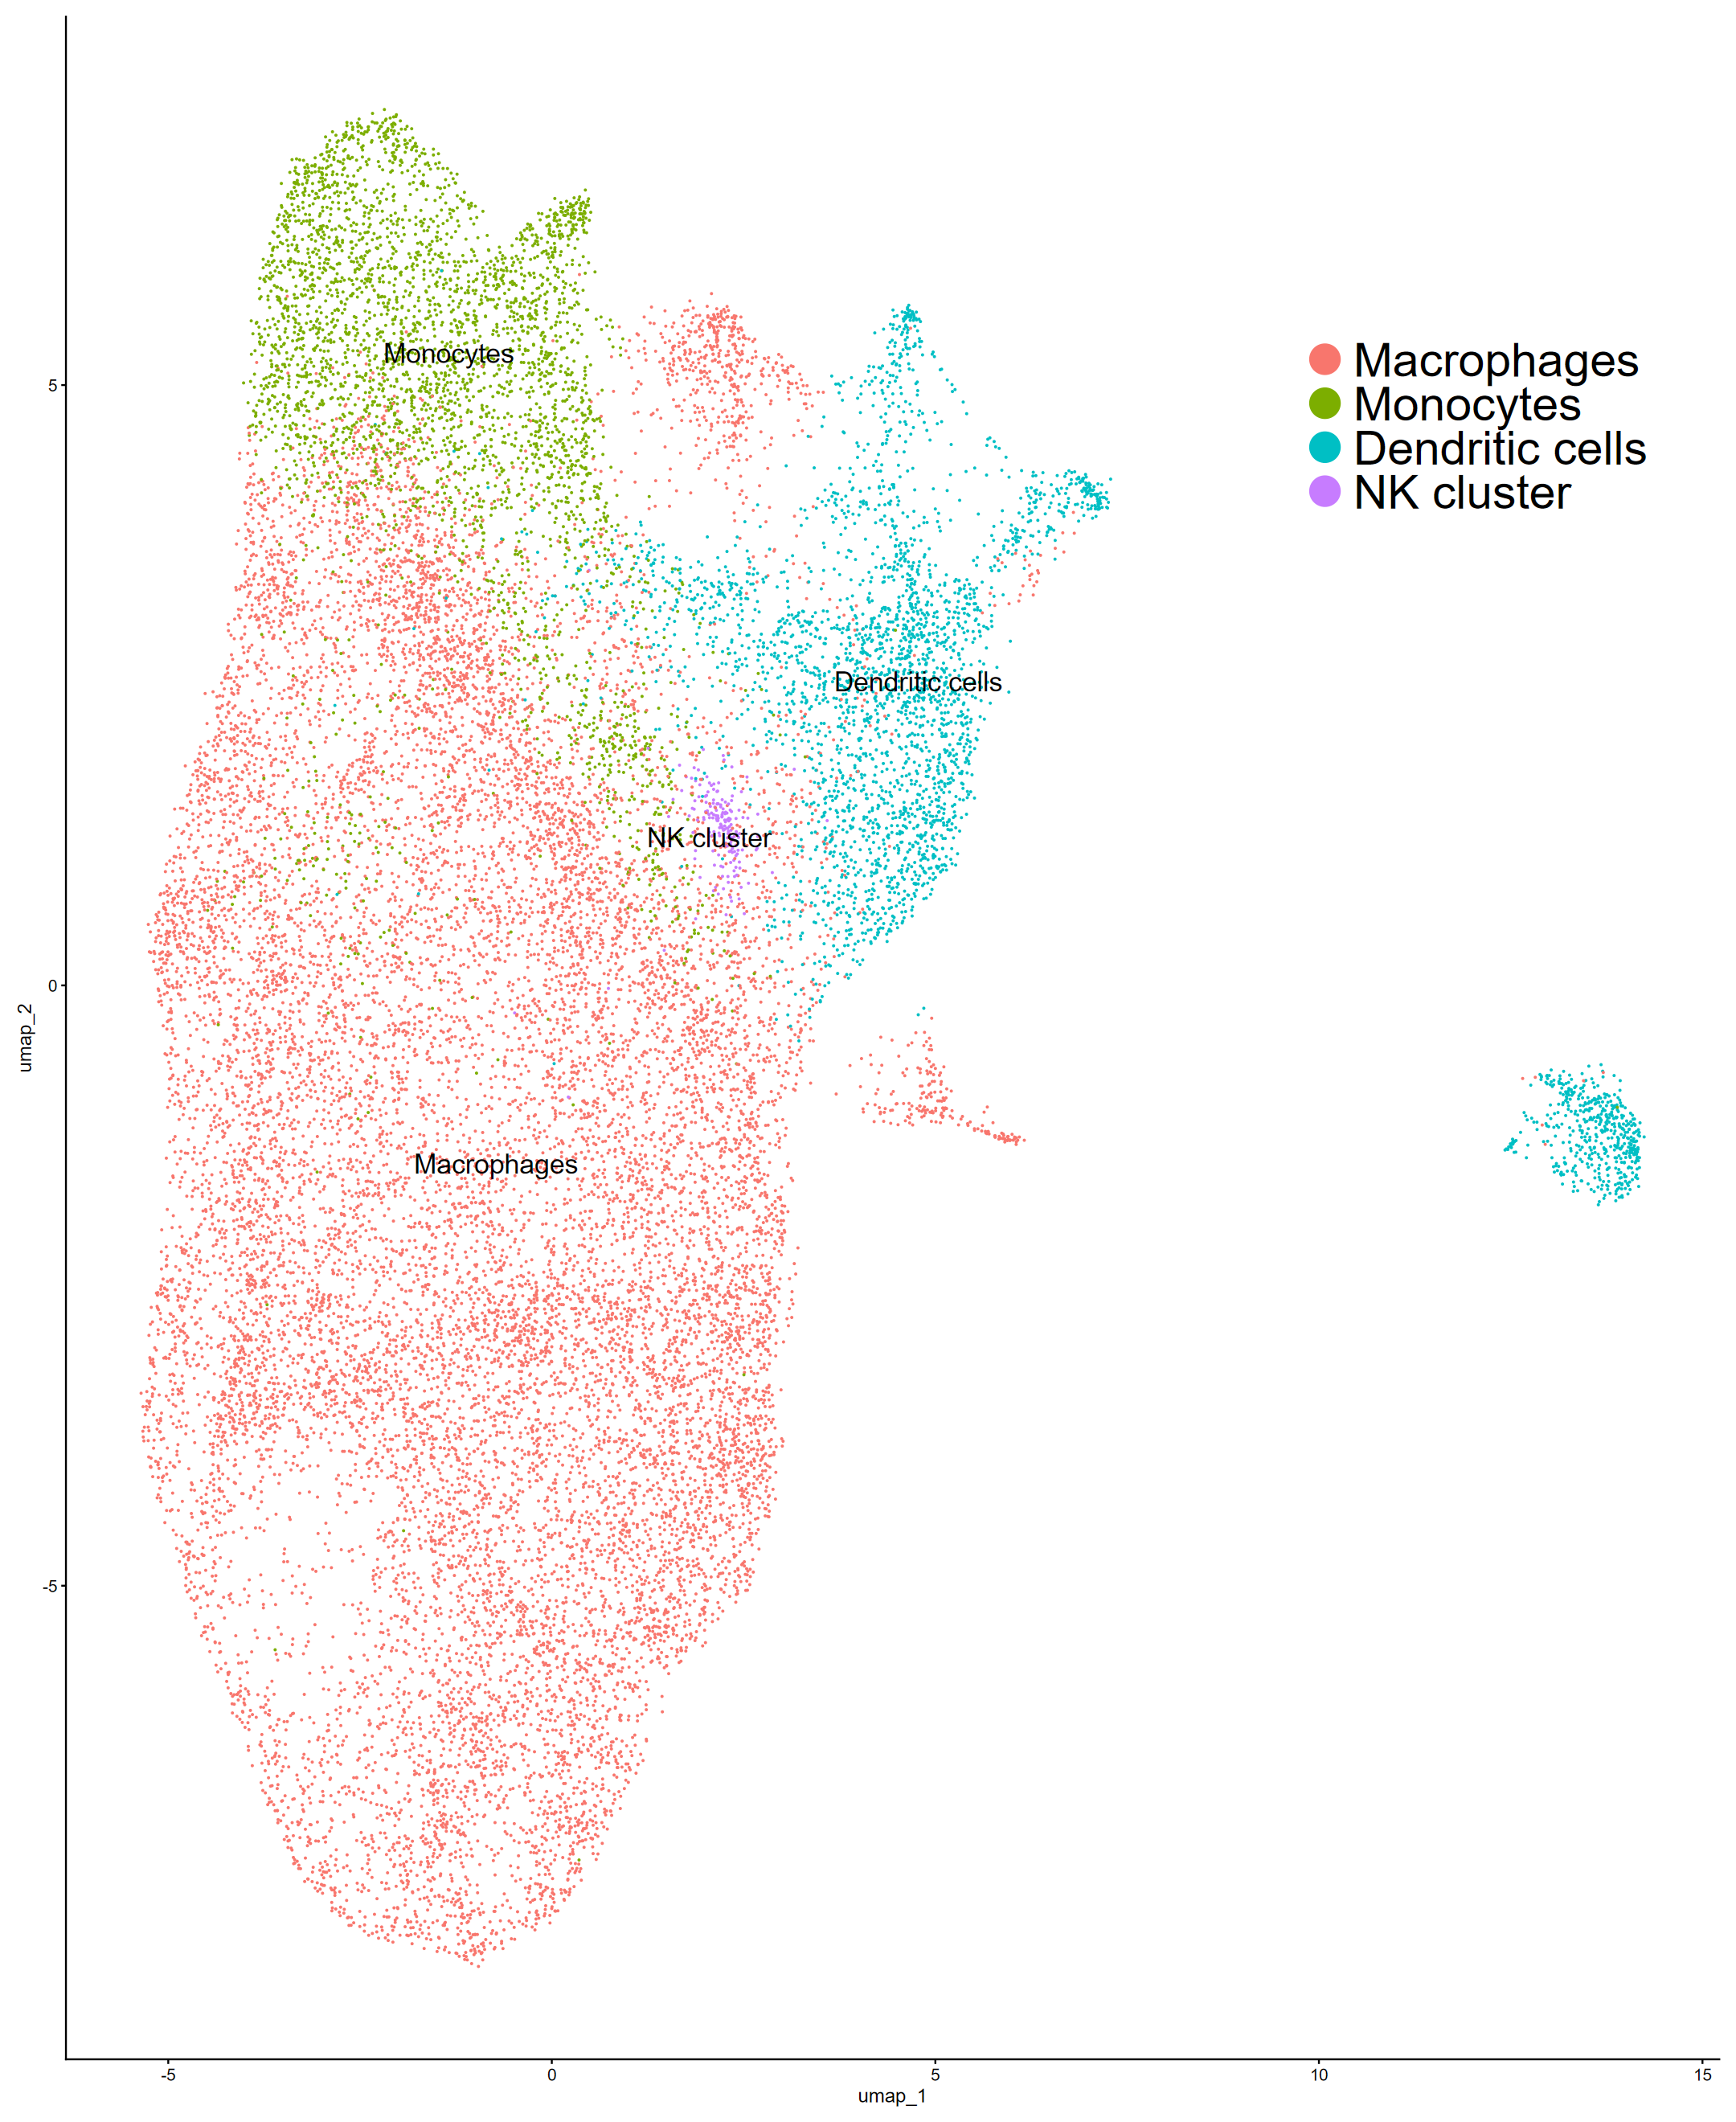

In [ ]:
# Show final annotation
final_annotation

In [ ]:
# Plot of Final annotations
myeloids$cell_type_idents <- Idents(myeloids)
final_annotation <- DimPlot(object = myeloids, reduction = "umap", group.by = "cell_type_idents", label = T, label.size = 7, repel = T) + 
    theme(plot.title = element_blank(), legend.position = c(0.65, 0.9), legend.text = element_text(size = 28), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=1))

In [103]:
# Plot of Final annotations
res_1.5_plot <- DimPlot(myeloids, reduction = "umap", group.by = "RNA_snn_res.1.5", label = T, label.size = 7) + theme(legend.position= "none", plot.title = element_blank())

In [ ]:
# Plot heatmap
heatmap <- DoHeatmap(myeloids, features = top10$gene, size=5, angle=0, raster=FALSE, label = FALSE) +
  scale_fill_viridis_c(option="blue",na.value = "white") + theme(legend.position= "none", axis.text.y = element_text(size=15))

Warning message in DoHeatmap(myeloids, features = top10$gene, size = 5, angle = 0, :
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: THEMIS, PTPRCAP"
Warning message in viridisLite::viridis(n, alpha, begin, end, direction, option):
"Option 'blue' does not exist. Defaulting to 'viridis'."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


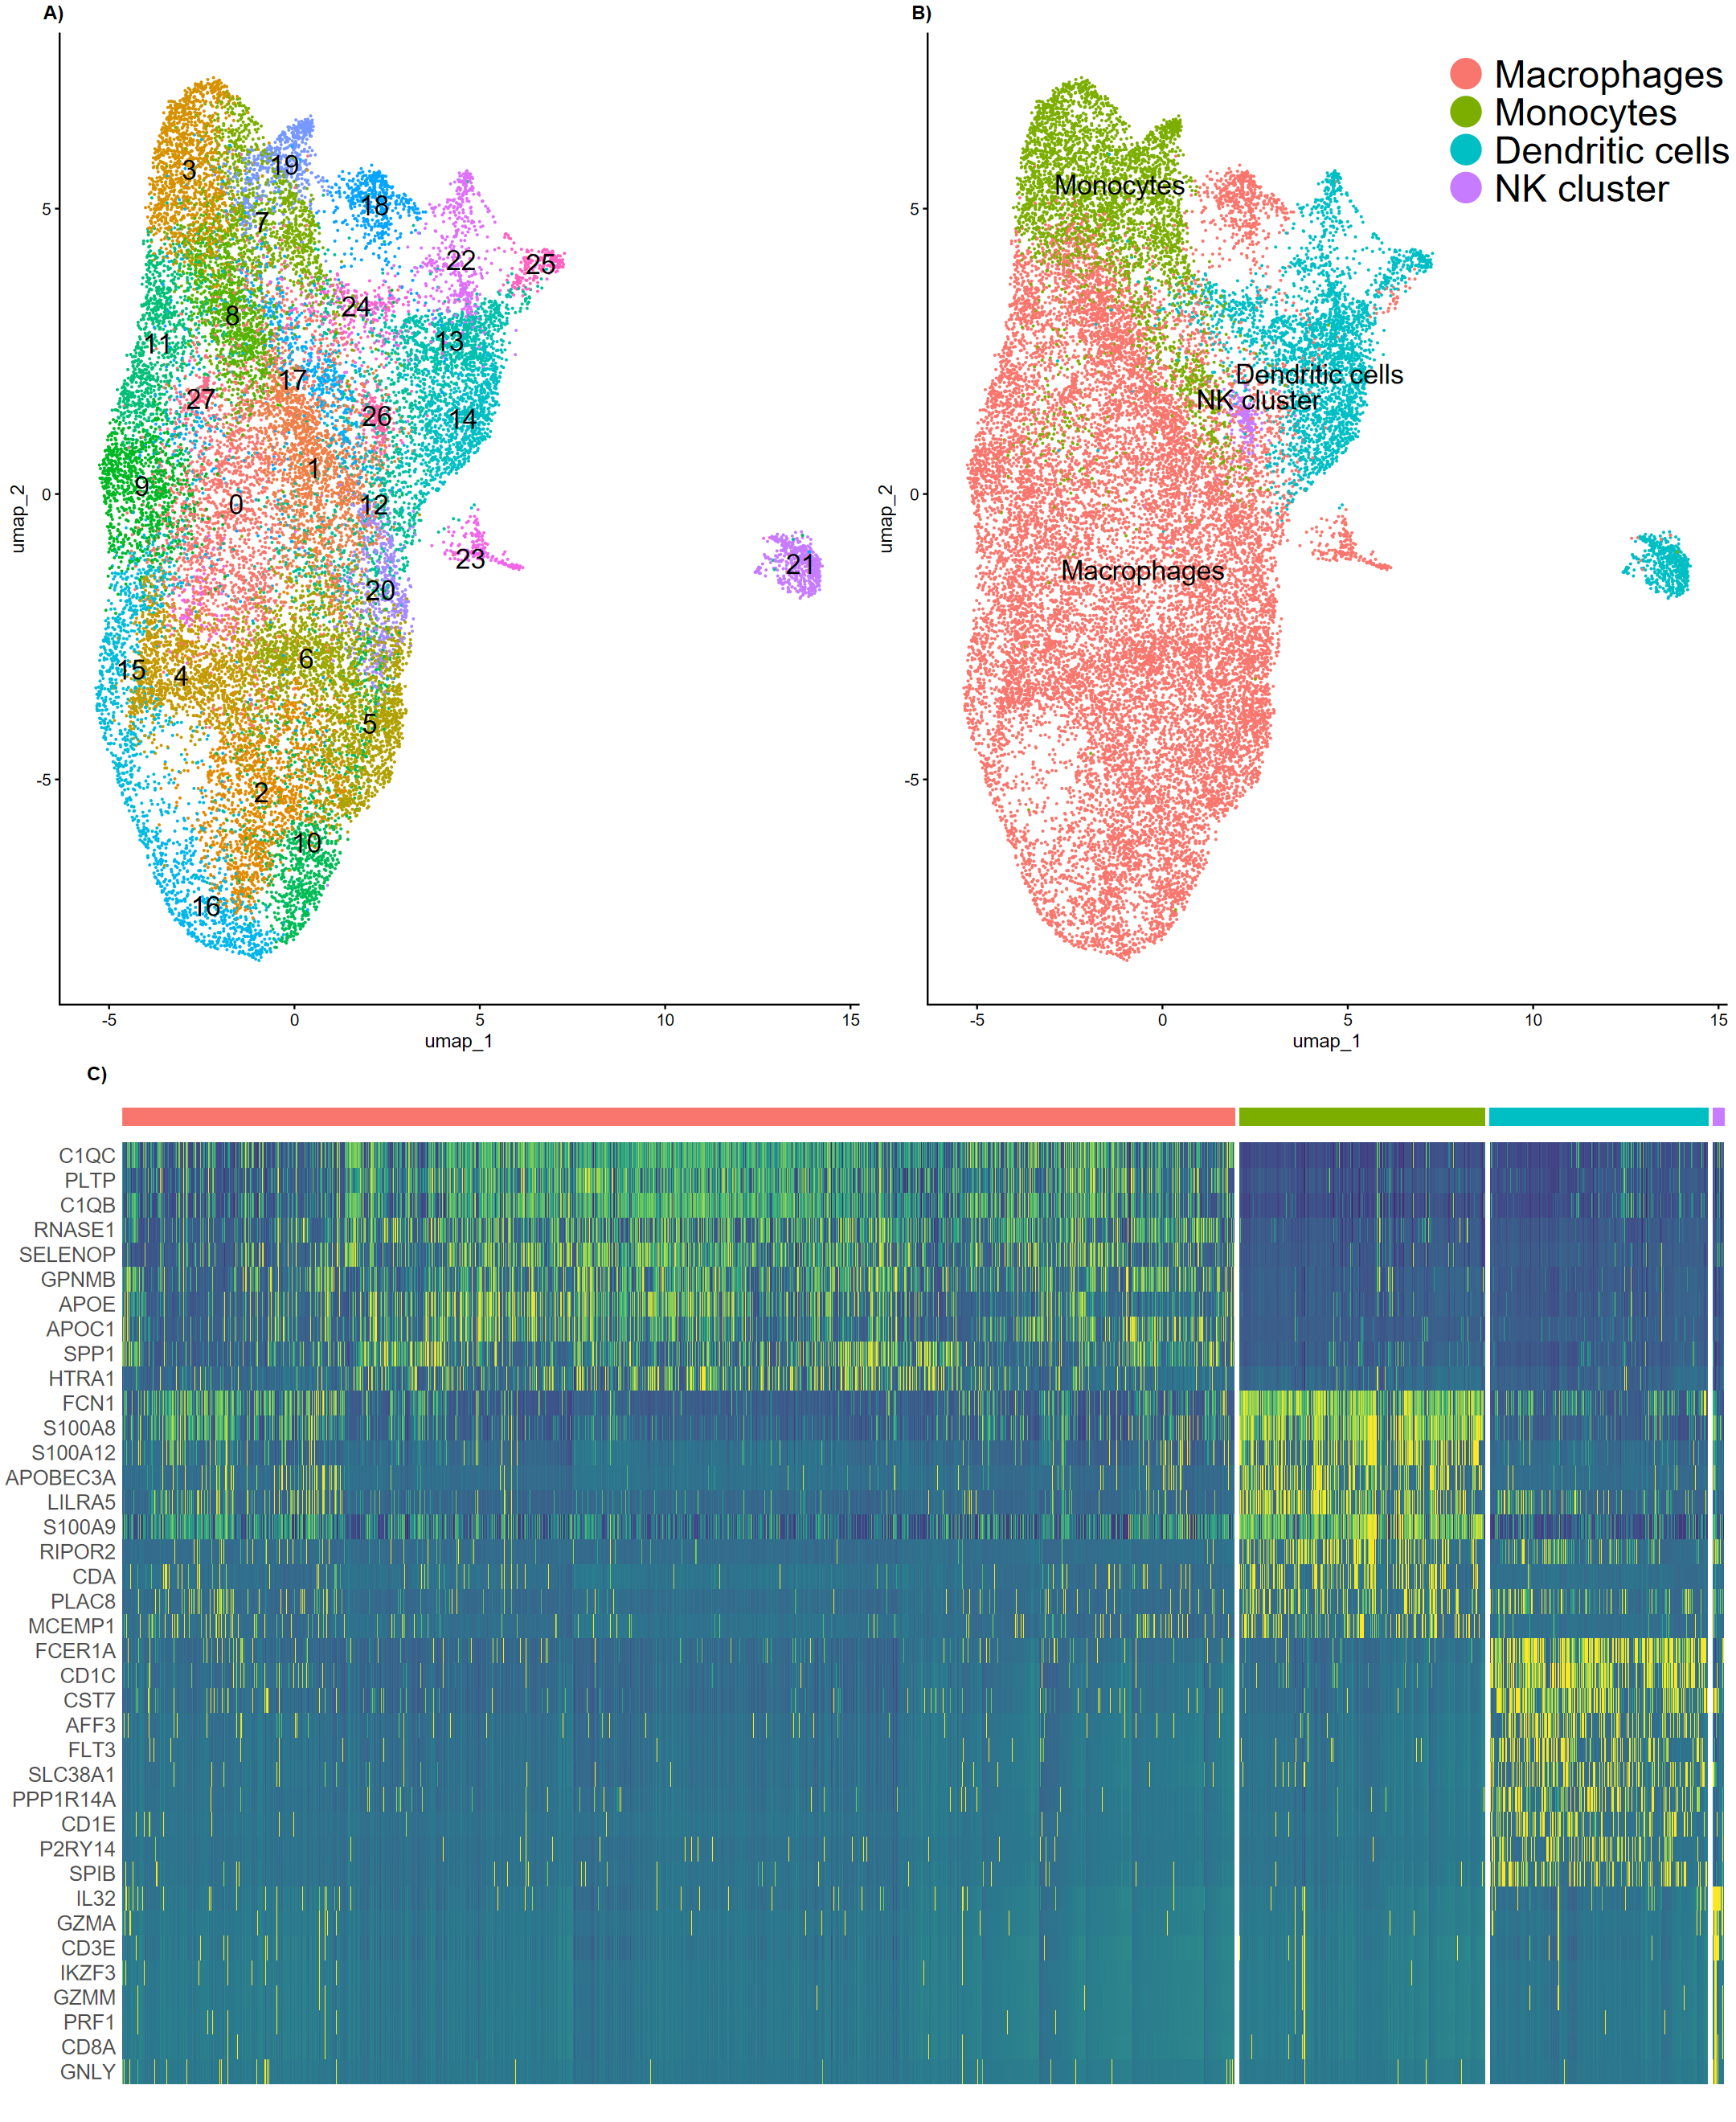

In [166]:
# Define the layout matrix
layout_matrix <- rbind(
  c(1, 1, 2, 2),
  c(1, 1, 2, 2),
  c(3, 3, 3, 3),
  c(3, 3, 3, 3)
)

# Create labeled plots
cluster_umap <- arrangeGrob(res_1.5_plot, 
                                  top = textGrob("A)", x = unit(0.05, "npc"), just = "left", 
                                                 gp = gpar(fontsize = 14, fontface = "bold")))

final_annotation_plot <- arrangeGrob(final_annotation, 
                               top = textGrob("B)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 14, fontface = "bold")))

heatmap_plot <- arrangeGrob(heatmap, 
                         top = textGrob("C)", x = unit(0.05, "npc"), just = "left", 
                                        gp = gpar(fontsize = 14, fontface = "bold")))

# Arrange the plots with labels
grid.arrange(
  cluster_umap, final_annotation_plot, heatmap_plot,
  layout_matrix = layout_matrix
)